In [1]:
 
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm
from scipy.stats import t

In [2]:
# defining t-score

def t_score(sample_size, sample_mean, pop_mean, sample_std):
    numerator = sample_mean - pop_mean
    denominator = sample_std / sample_size**0.5
    return numerator / denominator

#### Q-1: Pista House selling Hyderabadi Chicken Dum biryani claims that each parcel packet has 500 grams of biryani (also mentioned on the label of packet). You are sceptic of their claims and believe that on average each packet does not contain 500 grams of biryani. How do you prove your claim? (Given that the population std is 50)

Step - 1:
Alternate Hypothesis (Bold Claim): $$ H_1 \ : \ \mu \neq 500 $$

Null Hypothesis (Status Quo): $$ H_0 \ : \ \mu = 500 $$

Step - 2:
- Collect a sample of size n=10 $$ [ 490, 220, 470, 500, 495, 496, 496, 498, 508, 480 ] $$
- Compute sample mean $$ \bar{x} = 465.3 $$

Step - 3:
- Compute test statistic $$ t = \frac{465.3 - 500}{86.4/\sqrt[2]{10}} \ = -1.26 $$

Step - 4:
- Decide $ \alpha\ $ or Significance_level $$ \alpha = 0.05 $$

Step - 5.1:
- Define two tailed t-test $$ \ Fail \ to \ reject \ Null \ Hypothesis \ $$
Step - 5.2:
- Compute p value $$ \ P \ value \ = \ 0.26 \ $$  $$ \ Fail \ to \ reject \ Null \ Hypothesis \ $$

In [3]:
l = [490, 220, 470, 500, 495, 496, 496, 498, 508, 480]

sum(l)/len(l)

465.3

In [4]:
# Two Tail - Calculating the t-critical value
confidence_level = 0.95

alpha = 1 - confidence_level

t_critical = t.ppf(1-alpha/2, df = 9)

print(t_critical)

2.2621571627409915


In [5]:
# Defining the sample and population parameters

sample_size = 10
sample_mean = 465.3
pop_mean = 500
sample_std = 86.84

In [6]:
t = t_score(sample_size, sample_mean, pop_mean, sample_std)

print(t)

-1.2636001244569637


Text(465.3, 0.0007, 'x_bar')

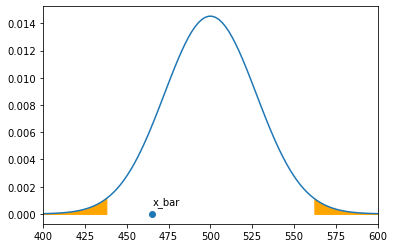

In [7]:
# Ploting the sampling distribution with rejection regions

# Defining the x minimum and x maximum
x_min = 400
x_max = 600


# Defining the sampling distribution mean and sampling distribution std
mean = pop_mean
std = sample_std / sample_size**0.5


# Ploting the graph and setting the x limits
x = np.linspace(x_min, x_max, 100)
y = norm.pdf(x, mean, std)
plt.xlim(x_min, x_max)
plt.plot(x, y)


# Computing the left and right critical values (Two tailed Test)
t_critical_left = pop_mean + (-t_critical * std)
t_critical_right = pop_mean + (t_critical * std)


# Shading the left rejection region
x1 = np.linspace(x_min, t_critical_left, 100)
y1 = norm.pdf(x1, mean, std)
plt.fill_between(x1, y1, color='orange')


# Shading the right rejection region
x2 = np.linspace(t_critical_right, x_max, 100)
y2 = norm.pdf(x2, mean, std)
plt.fill_between(x2, y2, color='orange')


# Ploting the sample mean and concluding the results 
plt.scatter(sample_mean, 0)
plt.annotate("x_bar", (sample_mean, 0.0007))


# In this case sample mean falls in the rejection region
# i.e. here we reject the Null Hypothesis

In [8]:
# Conclusion using z test

if(np.abs(t) > t_critical):
    print("Reject Null Hypothesis")
else:
    print("Fail to reject Null Hypothesis")

Fail to reject Null Hypothesis


In [9]:
# Conclusion using p test

p_value = 2 * (1.0 - norm.cdf(np.abs(t)))

print("p_value = ", p_value)

if(p_value < alpha):
    print("Reject Null Hypothesis")
else:
    print("Fail to reject Null Hypothesis")

p_value =  0.20637358891012125
Fail to reject Null Hypothesis


#### Q-2: You have developed a new Natural Language Processing Algorithms and done a user study. You claim that the average rating given by the users is greater than 4 on a scale of 1 to 5. How do you prove this to your client? (Given that the population std is 0.5)

Step - 1:
Alternate Hypothesis (Bold Claim): $$ \ H_1 \ : \ \mu \ > 4 $$

Null Hypothesis (Status Quo): $$ \ H_0 \ : \ \mu \geq \ 4 $$

Step - 2:
- Collect a sample of size n=20 $$ [ 4,3,5,4,5,3,5,5,4,2,4,5,5,4,4,5,4,5,4,5 ] $$
- Compute sample mean $$ \bar{x} = \ 4.25 \ $$

Step - 3:
- Compute test statistic $$ \ t = \frac{ 4.25-4}{ 0.85/\sqrt[2]{20}} \ = 1.31 $$

Step - 4:
- Decide $ \alpha\ $ or significance_level $$ \alpha = 0.05 \ $$

Step - 5.1:
- Define right tail test $$ \ Fail \ to \ reject \ Null \ Hypothesis \ $$
Step - 5.2:
- Compute p_value $$ \ P \ value \ = 0.09 \ $$  $$ \ Fail \ to \ reject \ Null \ Hypothesis \ $$

In [10]:
l = [4,3,5,4,5,3,5,5,4,2,4,5,5,4,4,5,4,5,4,5]
sum(l)/len(l)

4.25

In [11]:
# Right tailed test
from scipy.stats import t
confidence_level = 0.95
alpha = 1 - confidence_level
t_critical = t.ppf(1 - alpha, df=19)
print(t_critical)

1.729132811521367


In [12]:
# Code for sample standard deviation
import statistics
sample = [4,3,5,4,5,3,5,5,4,2,4,5,5,4,4,5,4,5,4,5]
print("Standard Deviation of sample is % s " % (statistics.stdev(sample)))

Standard Deviation of sample is 0.8506963092234007 


In [13]:
# Defining the sample and population parameters

sample_size = 20
sample_mean = 4.25
pop_mean = 4
sample_std = 0.85

In [14]:
t = t_score(sample_size, sample_mean, pop_mean, sample_std)
print(t)

1.3153341044116411


Text(4.25, 0.1, 'x_bar')

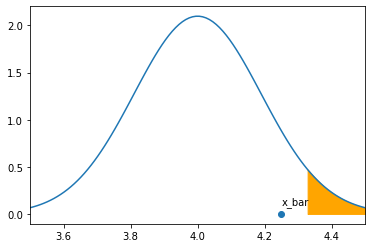

In [15]:
# plotting the sampling distriburtions with rejection regions

# Defining the x-min and x-max
x_min = 3.5
x_max = 4.5

# Defining the sampling distribution mean and sampling distribution std
mean = pop_mean
std = sample_std / (sample_size ** 0.5)

# plotting graaph and setting x-limits
x = np.linspace(x_min, x_max, 100)
y = norm.pdf(x, mean, std)
plt.xlim(x_min, x_max)
plt.plot(x, y)

# computing the right critical value (right tailed test)
t_critical_right = pop_mean + (t_critical * std)

# shading the right rejection region
x1 = np.linspace(t_critical_right, x_max, 100)
y1 = norm.pdf(x1, mean, std)
plt.fill_between(x1, y1, color='orange')

# plotting the saample mean and concluding the results
plt.scatter(sample_mean, 0)
plt.annotate("x_bar", (sample_mean, 0.1))

In [16]:
# conclusion using right tailed t test
if(t > t_critical):
    print('Reject null hypothesis')
else:
    print('Fail to reject null hypothesis')

Fail to reject null hypothesis


In [17]:
# Conclusion using p test
p_value = 1.0 - norm.cdf(np.abs(t))
print("P_value = ", p_value)

if(p_value < alpha):
    print('Reject null hypothesis')
else:
    print('Fail to reject null hypothesis')

P_value =  0.09419882054165774
Fail to reject null hypothesis


#### Q-3: TATA has developed a better fuel management system for the SUV segment. They claim that with this system, on average the SUV's mileage is at least 15 km/litre? (Given that the population std is 1)

Step - 1:
Alternate Hypothesis (Bold Claim): $$ \ H_1 \ : \ \mu \ > \ 15 \ $$

Null Hypothesis (Status Quo): $$ \ H_0 \ : \ \mu \geq \ 15 \ $$

Step - 2:
- Collect a sample of size n=20 $$ [ 14.08, 14.13, 15.65, 13.78, 16.26, 14.97, 15.36, 15.81, 14.53, 16.79, 15.78, 16.98, 13.23, 15.43, 15.46, 13.88, 14.31, 14.41, 15.76, 15.38 ] $$
-  Compute sample mean  $$ \bar{x} \ = \ 15.09 \ $$

Step - 3:
- Compute test statistic $$ \ t \ = \frac{15.09-15}{1.02/\sqrt[2]{20}} \ = \ 1.72 \ $$

Step - 4:
- Decide $ \alpha\ $ or significance_level $$ \alpha \ = 0.05 \ $$

Step - 5.1:
- Define right tail test $$ \ Fail \ to \ reject \ Null \ Hypothesis \ $$
Step - 5.2:
- Compute P_value $$ \ P \ value \ = \ 0.34 \ $$  $$ \ Fail \ to \ reject \ Null \ Hypothesis \ $$ 

In [18]:
l = [14.08, 14.13, 15.65, 13.78, 16.26, 14.97, 15.36, 15.81, 14.53, 16.79, 15.78, 16.98, 13.23, 15.43, 15.46, 13.88, 14.31, 14.41, 15.76, 15.38]
sum(l)/len(l)

15.098999999999998

In [19]:
# one tail(right tailed test)
from scipy.stats import t
confidence_level = 0.95
alpha = 1 - confidence_level
t_critical = t.ppf(1 - alpha, df=19)
print(t_critical)

1.729132811521367


In [20]:
# calculating sample for standard deviation
import statistics
sample =  [14.08, 14.13, 15.65, 13.78, 16.26, 14.97, 15.36, 15.81, 14.53, 16.79, 15.78, 16.98, 13.23, 15.43, 15.46, 13.88, 14.31, 14.41, 15.76, 15.38]
print("Standard Deviation of sample is % s " % (statistics.stdev(sample)))

Standard Deviation of sample is 1.0253671999517258 


In [21]:
# Defining the values
sample_size = 20
sample_mean = 15.09
pop_mean = 15
sample_std = 1.02

In [22]:
t = t_score(sample_size, sample_mean, pop_mean, sample_std)
print(t)

0.3946002313234917


Text(15.09, 0.1, 'x_bar')

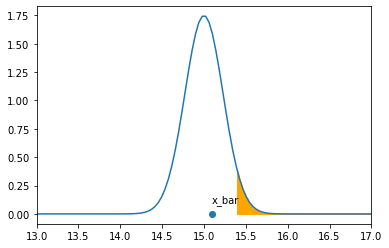

In [23]:
# plotting the sampling distribution with rejection regions
x_min = 13
x_max = 17

# Definig the sampling distribution mean and sampling ditribution std
mean = pop_mean
std = sample_std / (sample_size ** 0.5)

# plotting graph and setting x-lmits
x = np.linspace(x_min, x_max, 100)
y = norm.pdf(x, mean, std)
plt.xlim(x_min, x_max)
plt.plot(x, y)

t_critical_right = pop_mean + (t_critical * std)

x1 = np.linspace(t_critical_right, x_max, 100)
y1 = norm.pdf(x1, mean, std)
plt.fill_between(x1, y1, color='orange')

plt.scatter(sample_mean, 0)
plt.annotate("x_bar", (sample_mean, 0.1))

In [24]:
# conclusion using t test
if(t > t_critical):
    print('Reject null hypothesis')
else:
    print('Fail to reject null hypothesis')

Fail to reject null hypothesis


In [25]:
p_value = 1.0 - norm.cdf(np.abs(t))

print("P_value = ", p_value)

if(p_value < alpha):
    print("Reject null hypothesis")
else:
    print("Fail to reject null hypothesis")

P_value =  0.34656897139298426
Fail to reject null hypothesis


#### Q-4: You have developed a new Machine Learning Application and claim that on average it takes less than 100 ms to predict for any future datapoint. How do you convince your client about this claim? (Based on past data you know that the std is 10 ms)

Step - 1:
Alternate Hypothesis (Bold Claim): $$ H_1 \ : \ \mu = \ 100 \ $$

Null Hypothesis (Status Quo): $$ H_0 \ : \ \mu \leq \ 100 \ $$

Step - 2:
- Collect a sample of size n=100
- Compute sample mean $$ \bar{x} \ = \ 97.5 \ $$

Step - 3:
- Compute test statistic $$ t = \frac{97.5-100}{10/\sqrt[2]{100}} \ = \ -2.5 \ $$

Step - 4: 
- Decide $ \alpha\ $ or significance_level  $$ \alpha = \ 0.01 \ $$

Step - 5.1:
- Define left tail test $$ \ Reject \ Null \ Hypothesis \ $$
Step - 5.2:
- Compute P_value 

In [26]:
from scipy.stats import t
confidence_level = 0.99
alpha = 1 - confidence_level
t_critical = t.ppf(1-alpha, df=99)
print(t_critical)

2.3646058614359737


In [27]:
# Defining the values
sample_size = 100
sample_mean = 97.5
pop_mean = 100
sample_std = 10

In [28]:
t = t_score(sample_size, sample_mean, pop_mean, sample_std)
print(t)

-2.5


Text(97.5, 0.02, 'x_bar')

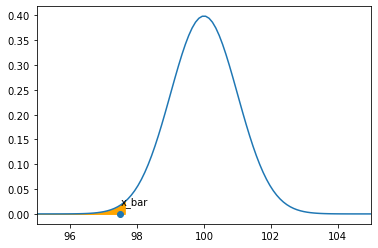

In [29]:
x_min = 95
x_max = 105

mean = pop_mean
std = sample_std / (sample_size**0.5)

x = np.linspace(x_min, x_max, 100)
y = norm.pdf(x, mean, std)
plt.xlim(x_min, x_max)
plt.plot(x, y)

t_critical_left = pop_mean + (-t_critical * std)

x1 = np.linspace(x_min, t_critical_left, 100)
y1 = norm.pdf(x1, mean, std)
plt.fill_between(x1, y1, color='orange')

plt.scatter(sample_mean, 0)
plt.annotate("x_bar", (sample_mean, 0.02))

In [30]:
if(t < -t_critical):
    print("Reject Null Hypothesis")
else:
    print("Fail to reject Null Hypothesis")

Reject Null Hypothesis


In [31]:
p_value = 1.0 - norm.cdf(np.abs(t))
print("p_value = ", p_value)
if(p_value < 0.01):
    print("Reject Null Hypothesis")
else:
    print("Fail to Reject Null Hypothesis")

p_value =  0.006209665325776159
Reject Null Hypothesis
